In [18]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

1) Downloading Data (Collection of data)

We have to download historical data from yaahoo finance 

Here in the code below we provided the name of the stock and the start state of the stock from which we want the data and the end date of the stock data 

In [12]:
stock = yf.download('AAPL',start = '2020-01-01',end = '2023-01-01')

[*********************100%%**********************]  1 of 1 completed


Calulcating Moving Average 

In [13]:

stock['Moving Average'] = stock['Close'].rolling(window=20).mean()

Generate buy and sell signals

In [14]:
stock['Signal'] = 0
stock['Signal'][stock['Close'] > stock['Moving Average']] = -1  # Sell signal
stock['Signal'][stock['Close'] < stock['Moving Average']] = 1   # Buy signal

C:\Users\CHITRESH.LAPTOP-DAD6S1E5\AppData\Local\Temp\ipykernel_14340\2439594140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['Signal'][stock['Close'] > stock['Moving Average']] = -1  # Sell signal
C:\Users\CHITRESH.LAPTOP-DAD6S1E5\AppData\Local\Temp\ipykernel_14340\2439594140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['Signal'][stock['Close'] < stock['Moving Average']] = 1   # Buy signal


Backtest Strategy

PCT CHANGE :-  calculates the percentage change between the current and prior element in a DataFrame or Series.

Example code :- 

import pandas as pd

# Sample data
data = {'prices': [100, 105, 102, 108, 107]}
df = pd.DataFrame(data)

# Calculate percentage change
df['pct_change'] = df['prices'].pct_change() * 100

print(df)

Output :- 

   prices  pct_change
0     100         NaN
1     105    5.000000
2     102   -2.857143
3     108    5.882353
4     107   -0.925926


When we apply the shift function the value of current row get's shifted to the next one 

import pandas as pd

# Sample data
data = {'value': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

print(df)

# Shift the data by 1 period
df['shifted'] = df['value'].shift(1)

print(df)


   value  shifted
0     10      NaN
1     20     10.0
2     30     20.0
3     40     30.0
4     50     40.0



In [15]:
stock['Returns'] = stock['Close'].pct_change()
stock['Strategy Returns'] = stock['Returns'] * stock['Signal'].shift(1)

In [16]:
stock['Cumulative Market Returns'] = (1 + stock['Returns']).cumprod()
stock['Cumulative Strategy Returns'] = (1 + stock['Strategy Returns']).cumprod()


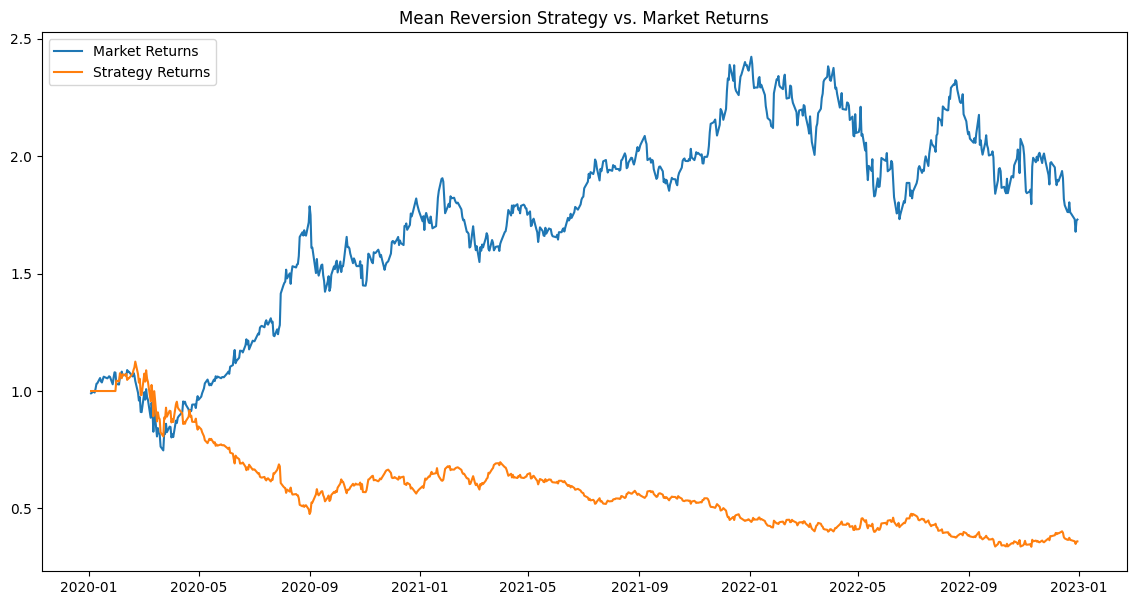

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(stock['Cumulative Market Returns'], label='Market Returns')
plt.plot(stock['Cumulative Strategy Returns'], label='Strategy Returns')
plt.legend()
plt.title('Mean Reversion Strategy vs. Market Returns')
plt.show()
